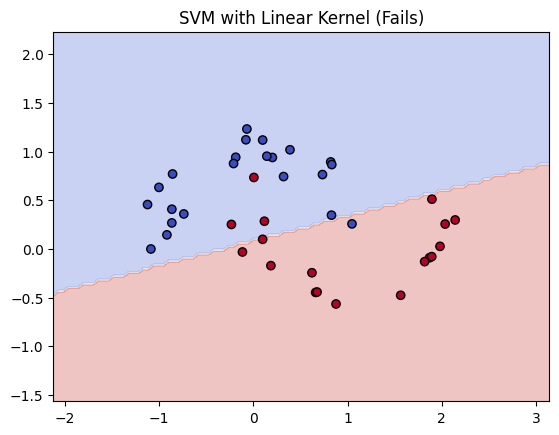

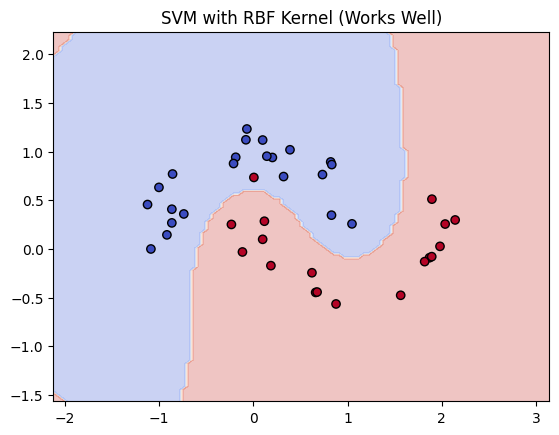

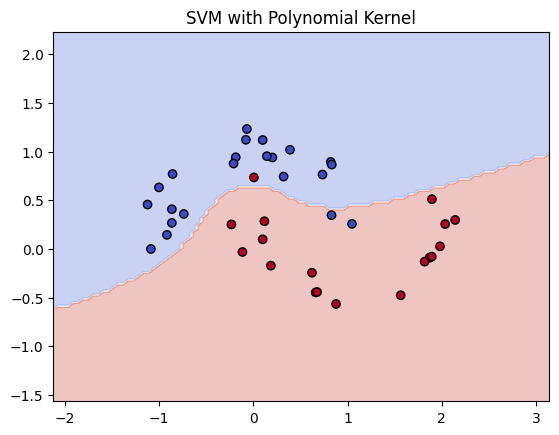

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split

# Generate a non-linearly separable dataset (moons dataset)
X, y = make_moons(n_samples=200, noise=0.1, random_state=42)

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train SVM with Linear Kernel (Fails for non-linearly separable data)
svm_linear = SVC(kernel='linear')
svm_linear.fit(X_train, y_train)

# Train SVM with RBF Kernel (Works well for non-linear data)
svm_rbf = SVC(kernel='rbf', gamma=1)
svm_rbf.fit(X_train, y_train)

# Train SVM with Polynomial Kernel
svm_poly = SVC(kernel='poly', degree=3)
svm_poly.fit(X_train, y_train)

# Plot decision boundaries
def plot_decision_boundary(model, X, y, title):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', edgecolors='k')
    plt.title(title)
    plt.show()

plot_decision_boundary(svm_linear, X_test, y_test, "SVM with Linear Kernel (Fails)")
plot_decision_boundary(svm_rbf, X_test, y_test, "SVM with RBF Kernel (Works Well)")
plot_decision_boundary(svm_poly, X_test, y_test, "SVM with Polynomial Kernel")


Model Accuracy: 0.9825

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.95      0.98        43
           1       0.97      1.00      0.99        71

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



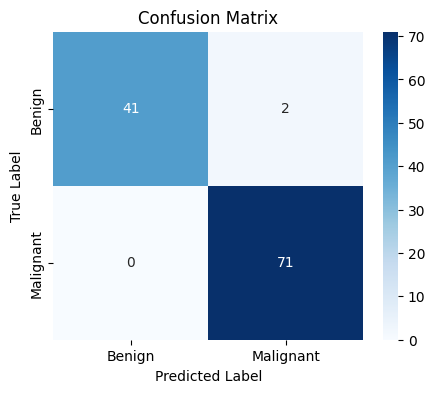

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Step 1: Load Dataset
data = load_breast_cancer()
X, y = data.data, data.target  # Features and labels

# Step 2: Split into Train & Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Standardize Features (SVM is sensitive to feature scales)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 4: Train SVM Classifier with RBF Kernel
svm_model = SVC(kernel='rbf', C=1.0, gamma='scale')  # RBF kernel for complex decision boundaries
svm_model.fit(X_train_scaled, y_train)

# Step 5: Make Predictions
y_pred = svm_model.predict(X_test_scaled)

# Step 6: Evaluate Model
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Step 7: Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix



In [25]:
from sklearn.datasets import load_digits

digits = load_digits()
X, y = digits.data, digits.target  # Smaller dataset, faster loading


In [26]:
X = X / 255.0

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state= 42, test_size=0.1)

In [28]:
print(X_train)

[[0.         0.         0.05098039 ... 0.03921569 0.         0.        ]
 [0.         0.         0.00392157 ... 0.02745098 0.         0.        ]
 [0.         0.         0.01176471 ... 0.04705882 0.01568627 0.        ]
 ...
 [0.         0.         0.03529412 ... 0.0627451  0.00784314 0.        ]
 [0.         0.         0.00392157 ... 0.         0.         0.        ]
 [0.         0.         0.00392157 ... 0.00392157 0.         0.        ]]


In [33]:
svm_model = SVC(kernel='rbf',gamma=0.5)
svm_model.fit(X_train, y_train)

SVC(gamma=0.5)

In [34]:
y_predict = svm_model.predict(X_test)

In [36]:
accuracy = accuracy_score(y_test, y_predict)
print(f"Model Accuracy: {accuracy:.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_predict))


Model Accuracy: 0.9000

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       0.69      0.82      0.75        11
           2       0.89      0.94      0.91        17
           3       0.88      0.82      0.85        17
           4       0.96      0.96      0.96        25
           5       0.95      0.86      0.90        22
           6       1.00      1.00      1.00        19
           7       0.95      0.95      0.95        19
           8       0.64      0.88      0.74         8
           9       0.86      0.76      0.81        25

    accuracy                           0.90       180
   macro avg       0.88      0.90      0.89       180
weighted avg       0.91      0.90      0.90       180



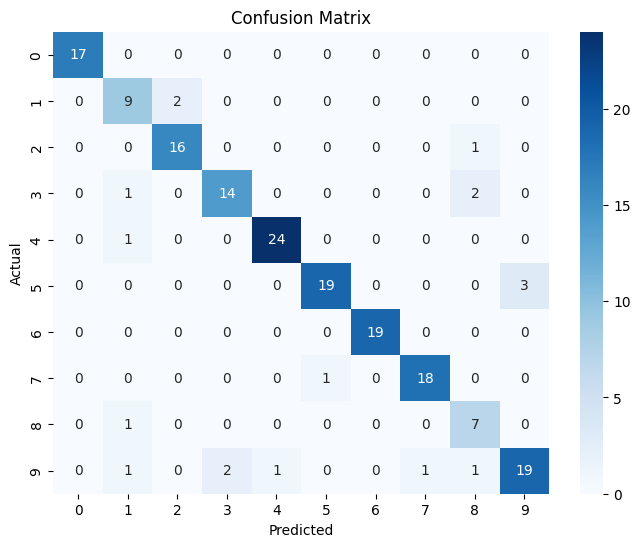

AttributeError: 'numpy.ndarray' object has no attribute 'iloc'

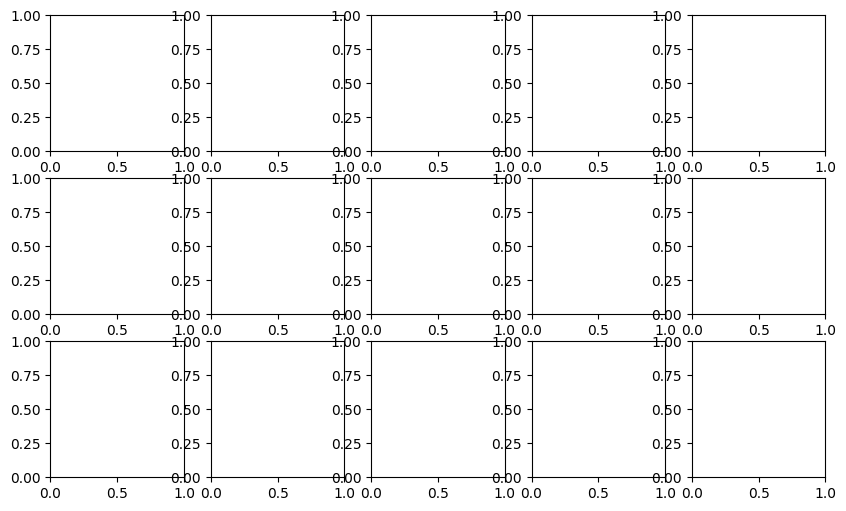

In [38]:
# Step 7: Confusion Matrix
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_test, y_predict), annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Step 8: Visualize Sample Predictions
fig, axes = plt.subplots(3, 5, figsize=(10, 6))
for i, ax in enumerate(axes.flat):
    ax.imshow(X_test.iloc[i].values.reshape(28, 28), cmap='gray')
    ax.set_title(f"Pred: {y_predict[i]}")
    ax.axis("off")
plt.show()

In [39]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [49]:
iris = datasets.load_iris()
X,y = iris.data, iris.target

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42,test_size=0.2)

In [52]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)  # Fit on training data
X_test = scaler.transform(X_test)        # Transform test data using the same scaler


In [54]:
svm_linear = SVC(kernel='linear',C = 1.0)
svm_linear.fit(X_train, y_train)

SVC(kernel='linear')

In [63]:
svm_rbf = SVC(kernel='rbf',gamma='scale',C=0.1)
svm_rbf.fit(X_train, y_train)

SVC(C=0.1)

In [64]:
y_pred_linear = svm_linear.predict(X_test)
y_pred_rbf = svm_rbf.predict(X_test)

In [65]:
print("Linear SVM Accuracy:", accuracy_score(y_test, y_pred_linear))
print("RBF SVM Accuracy:", accuracy_score(y_test, y_pred_rbf))

Linear SVM Accuracy: 0.9666666666666667
RBF SVM Accuracy: 0.9666666666666667


In [68]:
from sklearn.svm import SVC
from sklearn.multiclass import OneVsOneClassifier
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load dataset (handwritten digits 0-9)
X, y = load_digits(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train One-vs-One SVM
model = OneVsOneClassifier(SVC(kernel="linear"))
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 0.9777777777777777


In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [85]:
df = pd.read_csv('Machine Learning\ML Techniques\re.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'Machine Learning\\ML Techniques\re.csv'

In [1]:
from sklearn.tree import DecisionTreeClassifier

# Train a fully grown tree
clf_full = DecisionTreeClassifier(random_state=42)
clf_full.fit(X_train, y_train)

# Find the best ccp_alpha values
path = clf_full.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = path.ccp_alphas[:-1]  # Exclude the maximum alpha

# Train different pruned models
pruned_models = [DecisionTreeClassifier(ccp_alpha=alpha).fit(X_train, y_train) for alpha in ccp_alphas]

# Evaluate models
train_scores = [model.score(X_train, y_train) for model in pruned_models]
test_scores = [model.score(X_test, y_test) for model in pruned_models]

# Select best alpha (avoiding overfitting)
best_alpha = ccp_alphas[test_scores.index(max(test_scores))]

# Final pruned model
pruned_tree = DecisionTreeClassifier(ccp_alpha=best_alpha)
pruned_tree.fit(X_train, y_train)

print("Final Pruned Model Accuracy:", pruned_tree.score(X_test, y_test))


NameError: name 'X_train' is not defined